In [22]:
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:.1f}'.format


In [2]:
bills=pd.read_csv('BILLS.csv')
phn_del_bills=pd.read_csv('Phone_delivery_Bills.csv')
store_m=pd.read_csv('Store_master.csv')

In [3]:
bills.shape,phn_del_bills.shape,store_m.shape

((8344786, 8), (492674, 3), (340, 10))

In [4]:
bills['Till_No']=bills.BILL_KEY.apply(lambda x: x[-10:])
bills.head()

,Unnamed: 0,Cust_ID,VALID_MOBILE_NO_TAG,BILL_KEY,BILLDATE,Plant,IS_REFUND_BILL,NETAMT,Till_No
0,0,1,1,D0012023-04-0100003906540000000005,2023-04-01,D001,NaN,85.00,0000000005
1,1,2,0,D0012023-04-0100003906550000000005,2023-04-01,D001,NaN,113.01,0000000005
2,2,3,1,D0012023-04-0100003906560000000005,2023-04-01,D001,NaN,114.00,0000000005
3,3,3,1,D0012023-04-0100003906570000000005,2023-04-01,D001,NaN,60.00,0000000005
4,4,4,1,D0012023-04-0100003906580000000005,2023-04-01,D001,NaN,166.42,0000000005


In [5]:
# Creating boolean masks for PD channel and Online channel
pd_channel_mask = (bills['Till_No'] != '0000009999') & (bills['BILL_KEY'].isin(phn_del_bills['BILL_KEY']))
online_channel_mask = (bills['Till_No'] == '0000009999') & (~bills['BILL_KEY'].isin(phn_del_bills['BILL_KEY']))

# Assigning channel values based on boolean masks
bills.loc[pd_channel_mask, 'channel'] = 'PD'
bills.loc[online_channel_mask, 'channel'] = 'Online'
bills.loc[~(pd_channel_mask | online_channel_mask), 'channel'] = 'Instore'


In [6]:
a=bills[bills.Till_No=='0000009999'].BILL_KEY
print(a.shape)
ab=a.isin(phn_del_bills.BILL_KEY)
phn_del_bills[phn_del_bills.BILL_KEY.isin(a)]

(423862,)


,BILL_KEY,BILLDATE,NETAMT
6428,D4132023-04-0200039270350000009999,2023-04-02,1925.0
29563,D4132023-04-0700039330670000009999,2023-04-07,465.0
34672,D4132023-04-0800039344770000009999,2023-04-08,2045.0
91913,D4132023-04-2100039491930000009999,2023-04-21,3000.0
91916,D4132023-04-2300039513920000009999,2023-04-23,1100.0
...,...,...,...
476176,D4132023-07-2500040571190000009999,2023-07-25,7180.0
476177,D4132023-07-2600040583860000009999,2023-07-26,3880.0
476178,D4132023-07-2700040595030000009999,2023-07-27,8300.0
476181,D4132023-07-2800040608440000009999,2023-07-28,2380.0


In [7]:
'''Function to make channel column as asked but this will take a lot of time since a total of 8.3 milliion records are there. 
    Therefore boolean masking is better and efficient.'''
# def fun(row):
#     # PD channel calculations
#     if  (row.Till_No != '0000009999') & (row.BILL_KEY in phn_del_bills.BILL_KEY.values):
#         return 'PD'
#     # Online channel calculations 
#     elif (row.Till_No=='0000009999') & (row.BILL_KEY not in phn_del_bills.BILL_KEY.values):
#         return 'Online'  
    
#     else:
#         'Instore'

# bills['channel']=bills.apply(fun,axis=1)

In [6]:
bills.channel.value_counts()

channel
Instore    7428534
PD          492532
Online      423720
Name: count, dtype: int64

In [7]:
bills.head(10)

,Unnamed: 0,Cust_ID,VALID_MOBILE_NO_TAG,BILL_KEY,BILLDATE,Plant,IS_REFUND_BILL,NETAMT,Till_No,channel
0,0,1,1,D0012023-04-0100003906540000000005,2023-04-01,D001,NaN,85.00,0000000005,Instore
1,1,2,0,D0012023-04-0100003906550000000005,2023-04-01,D001,NaN,113.01,0000000005,Instore
2,2,3,1,D0012023-04-0100003906560000000005,2023-04-01,D001,NaN,114.00,0000000005,Instore
3,3,3,1,D0012023-04-0100003906570000000005,2023-04-01,D001,NaN,60.00,0000000005,Instore
4,4,4,1,D0012023-04-0100003906580000000005,2023-04-01,D001,NaN,166.42,0000000005,Instore
5,5,5,1,D0012023-04-0100003906590000000005,2023-04-01,D001,NaN,15.00,0000000005,Instore
6,6,4,1,D0012023-04-0100003906600000000005,2023-04-01,D001,NaN,310.00,0000000005,Instore
7,7,4,1,D0012023-04-0100003906610000000005,2023-04-01,D001,NaN,48.00,0000000005,Instore
8,8,3,1,D0012023-04-0100003906620000000005,2023-04-01,D001,NaN,135.00,0000000005,Instore
9,9,3,1,D0012023-04-0100003906630000000005,2023-04-01,D001,NaN,200.97,0000000005,Instore


In [8]:
# valid customers
valid_cust=bills[bills.VALID_MOBILE_NO_TAG==1]
# As asked to perform analysis only on those bills which are not refunded.
valid_bills=valid_cust.loc[valid_cust.IS_REFUND_BILL!= 1,:]
valid_bills

,Unnamed: 0,Cust_ID,VALID_MOBILE_NO_TAG,BILL_KEY,BILLDATE,Plant,IS_REFUND_BILL,NETAMT,Till_No,channel
0,0,1,1,D0012023-04-0100003906540000000005,2023-04-01,D001,NaN,85.00,0000000005,Instore
2,2,3,1,D0012023-04-0100003906560000000005,2023-04-01,D001,NaN,114.00,0000000005,Instore
3,3,3,1,D0012023-04-0100003906570000000005,2023-04-01,D001,NaN,60.00,0000000005,Instore
4,4,4,1,D0012023-04-0100003906580000000005,2023-04-01,D001,NaN,166.42,0000000005,Instore
5,5,5,1,D0012023-04-0100003906590000000005,2023-04-01,D001,NaN,15.00,0000000005,Instore
...,...,...,...,...,...,...,...,...,...,...
8344780,244780,3115720,1,D4172023-07-3100000035980000000001,2023-07-31,D417,NaN,178.00,0000000001,Instore
8344781,244781,971732,1,D4172023-07-3100000035990000000001,2023-07-31,D417,NaN,338.85,0000000001,Instore
8344782,244782,3115721,1,D4172023-07-3100000036000000000001,2023-07-31,D417,NaN,103.00,0000000001,Instore
8344784,244784,632224,1,D4172023-07-3100000035940000000001,2023-07-31,D417,NaN,17213.00,0000000001,PD


# Analysis

In [9]:
# Total Valid customers
valid_cust.shape[0]

7201292

In [10]:
# No of bills by total(valid+invalid) customers
bills[bills.IS_REFUND_BILL!=1].BILL_KEY.nunique()

8227073

In [12]:
# No of bills by valid customers

# valid_cust[valid_cust.IS_REFUND_BILL!=1].BILL_KEY.nunique()
# or
 
valid_bills.shape[0]

7142649

In [15]:
valid_bills

,Unnamed: 0,Cust_ID,VALID_MOBILE_NO_TAG,BILL_KEY,BILLDATE,Plant,IS_REFUND_BILL,NETAMT,Till_No,channel
0,0,1,1,D0012023-04-0100003906540000000005,2023-04-01,D001,NaN,85.00,0000000005,Instore
2,2,3,1,D0012023-04-0100003906560000000005,2023-04-01,D001,NaN,114.00,0000000005,Instore
3,3,3,1,D0012023-04-0100003906570000000005,2023-04-01,D001,NaN,60.00,0000000005,Instore
4,4,4,1,D0012023-04-0100003906580000000005,2023-04-01,D001,NaN,166.42,0000000005,Instore
5,5,5,1,D0012023-04-0100003906590000000005,2023-04-01,D001,NaN,15.00,0000000005,Instore
...,...,...,...,...,...,...,...,...,...,...
8344780,244780,3115720,1,D4172023-07-3100000035980000000001,2023-07-31,D417,NaN,178.00,0000000001,Instore
8344781,244781,971732,1,D4172023-07-3100000035990000000001,2023-07-31,D417,NaN,338.85,0000000001,Instore
8344782,244782,3115721,1,D4172023-07-3100000036000000000001,2023-07-31,D417,NaN,103.00,0000000001,Instore
8344784,244784,632224,1,D4172023-07-3100000035940000000001,2023-07-31,D417,NaN,17213.00,0000000001,PD


In [16]:
# Sales by valid cust per month (overall, by region, by stores, by channel)

valid_bills.BILLDATE=pd.to_datetime(valid_bills.BILLDATE,format='%Y-%m-%d')
valid_bills.info()

C:\Users\welcome\AppData\Local\Temp\ipykernel_9604\477772082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_bills.BILLDATE=pd.to_datetime(valid_bills.BILLDATE,format='%Y-%m-%d')


<class 'pandas.core.frame.DataFrame'>
Index: 7142649 entries, 0 to 8344785
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Unnamed: 0           int64         
 1   Cust_ID              int64         
 2   VALID_MOBILE_NO_TAG  int64         
 3   BILL_KEY             object        
 4   BILLDATE             datetime64[ns]
 5   Plant                object        
 6   IS_REFUND_BILL       float64       
 7   NETAMT               float64       
 8   Till_No              object        
 9   channel              object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 599.4+ MB


In [18]:
# checking if in valid cust bills there are any bills with negative amount.
valid_bills[valid_bills.NETAMT<0]
'''So no need of any cleaning'''

,Unnamed: 0,Cust_ID,VALID_MOBILE_NO_TAG,BILL_KEY,BILLDATE,Plant,IS_REFUND_BILL,NETAMT,Till_No,channel


In [21]:
Overall_monthly_sales=valid_bills.groupby(valid_bills.BILLDATE.dt.month_name()).agg(Total_Sales=('NETAMT','sum')).reset_index()
Overall_monthly_sales.columns=['Month']+['Total Sales']
Overall_monthly_sales

,Month,Total Sales
0,April,1626207773.9
1,July,1682763133.4
2,June,1566864530.9
3,May,1568634255.3


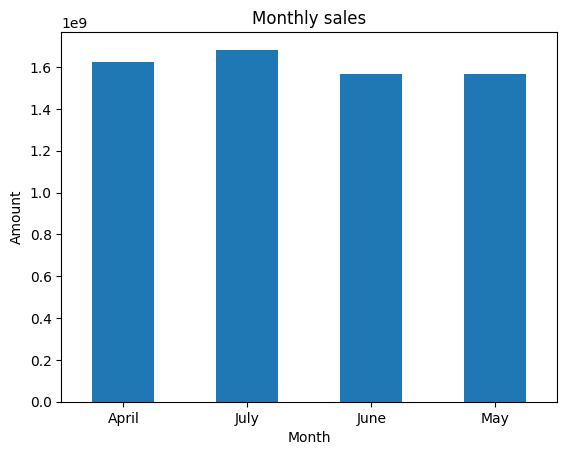

In [23]:
import matplotlib.pyplot as plt
Overall_monthly_sales.plot(kind='bar',x='Month',y='Total Sales')
plt.legend().set_visible(False)
plt.title('Monthly sales')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

C:\Users\welcome\AppData\Local\Temp\ipykernel_9604\1374536366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_bills['BILLDATE']=pd.to_datetime(total_bills.BILLDATE,format='%Y-%m-%d')


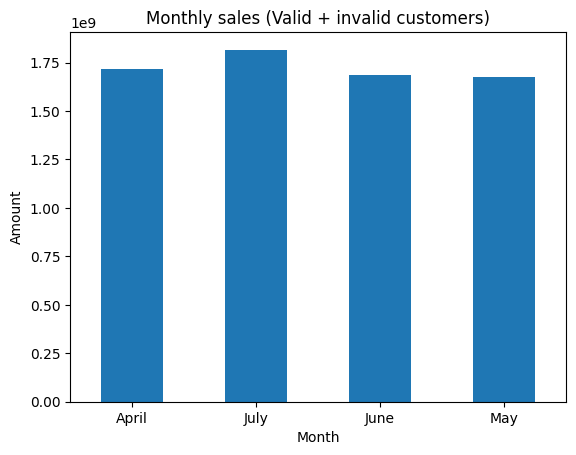

In [24]:
# Total (invalid + valid customers) monthly sales 

total_bills=bills[bills.IS_REFUND_BILL!=1]
total_bills['BILLDATE']=pd.to_datetime(total_bills.BILLDATE,format='%Y-%m-%d')


total_monthly_sales=total_bills.groupby(total_bills.BILLDATE.dt.month_name()).agg(Total_Sales=('NETAMT','sum')).reset_index()
total_monthly_sales.columns=['Month']+['Total Sales']

total_monthly_sales.plot(kind='bar',x='Month',y='Total Sales')
plt.legend().set_visible(False)
plt.title('Monthly sales (Valid + invalid customers)')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

In [47]:
# Region wise monthly sales
valid_bills=store_m.merge(valid_bills, left_on='Store_code',right_on='Plant',how='inner')


<Axes: xlabel='Month', ylabel='Total Sales'>

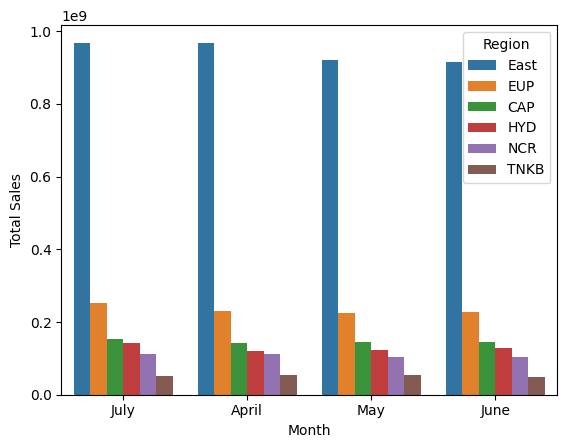

In [26]:
# Region wise monthly sales
Region_monthly_sales=valid_bills.groupby([valid_bills.BILLDATE.dt.month_name(),'Region']).agg(Total_Sales=('NETAMT','sum')).reset_index().sort_values(by='Total_Sales',ascending=False)
Region_monthly_sales.columns=['Month']+['Region']+['Total Sales']

import seaborn as sns
sns.barplot(Region_monthly_sales,x='Month',y='Total Sales',hue='Region')

<Axes: xlabel='Month', ylabel='Total Sales'>

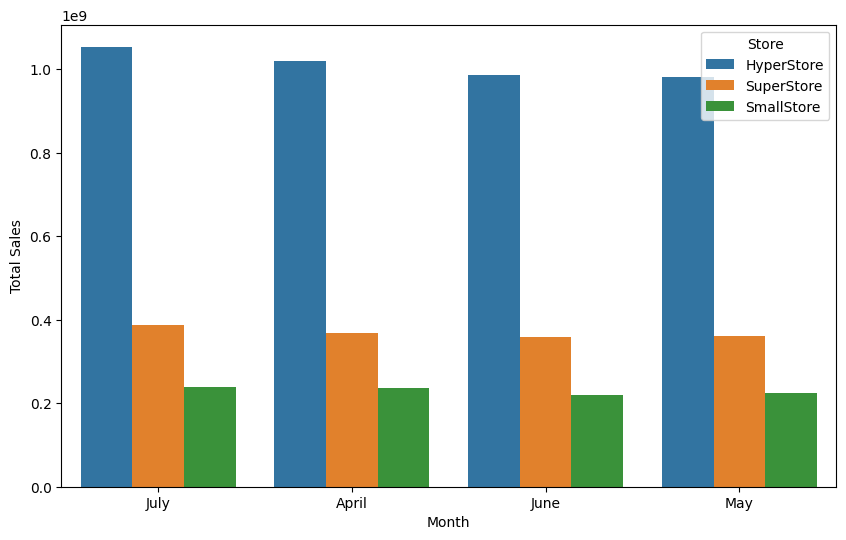

In [27]:
# Store wise monthly sales
store_monthly_sales=valid_bills.groupby([valid_bills.BILLDATE.dt.month_name(),'Store_type']).agg(Total_Sales=('NETAMT','sum')).reset_index().sort_values(by='Total_Sales',ascending=False)
store_monthly_sales.columns=['Month']+['Store']+['Total Sales']


import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(store_monthly_sales,x='Month',y='Total Sales',hue='Store')

<Axes: xlabel='Month', ylabel='Total Sales'>

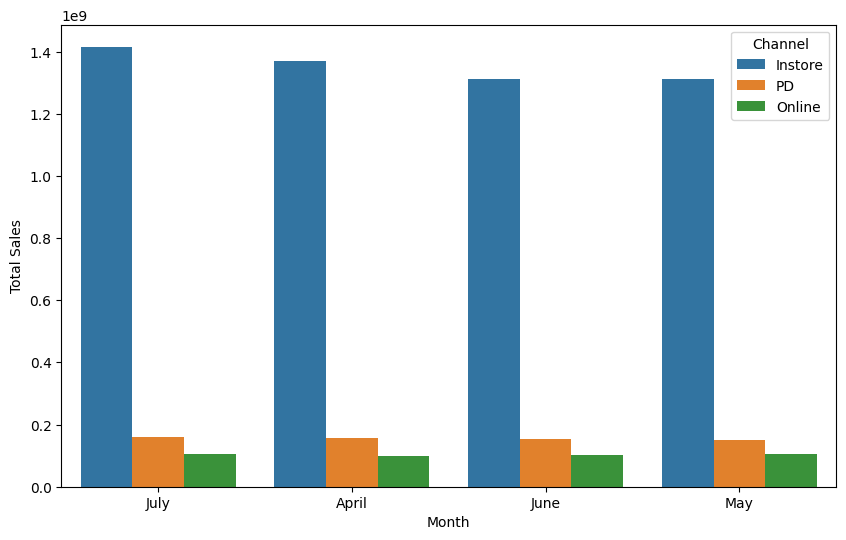

In [28]:
# Channel wise monthly sales
channel_monthly_sales=valid_bills.groupby([valid_bills.BILLDATE.dt.month_name(),'channel']).agg(Total_Sales=('NETAMT','sum')).reset_index().sort_values(by='Total_Sales',ascending=False)
channel_monthly_sales.columns=['Month']+['Channel']+['Total Sales']


import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(channel_monthly_sales,x='Month',y='Total Sales',hue='Channel')

## Customer Retention (MoM)

In [29]:
# If a customer is invalid it does not make sense to consider those customers in retenion so will do retention analysis on valid_cust dataframe

valid_cust.Cust_ID.nunique()

'''Based on the available data i.e data of months april,may,june and july, there are 
    approx 3.1 million valid customers (customer having valid phone no)  '''

3112198

In [41]:
# dictionary initialized to store retention count for each month
retention_counts = {'April': np.nan}
# calendar dct to help in calculation of retention count
calendar={4:'April',5:'May',6:'June',7:'July'}

# Loop through subsequent months (May, June, July)
for month in range(5, 8):

    # Previous & Current Month total Customers
    prev_month=valid_bills[valid_bills.BILLDATE.dt.month == month-1]['Cust_ID'].unique()
    current_month = valid_bills[valid_bills.BILLDATE.dt.month == month]['Cust_ID'].unique()
    
    # Overall customers active in previous month
    prev_month_active_customers= prev_month.size
    # Counting customers who returned in the current month from previous month
    returning_customers = pd.Series(current_month).isin(prev_month).sum()
    
    # Update retention counts dictionary
    retention_counts[calendar[month]] = [returning_customers,prev_month_active_customers]

print("Retention and Overall Customer Counts Month-wise:")
print(retention_counts)



Retention and Overall Customer Counts Month-wise:
{'April': nan, 'May': [293234, 1084036], 'June': [275744, 1038356], 'July': [277573, 1025705]}


In [42]:
df = pd.DataFrame(retention_counts)

# Transpose the DataFrame to switch rows and columns
df = df.T.reset_index()

# Rename the columns
df.columns = ['Month', 'Customers Returned (current month)', "Prev Month's Overall Customers"]

In [44]:
df['Retention Rate (in %)']= (df['Customers Returned (current month)']/df["Prev Month's Overall Customers"])*100
df

,Month,Customers Returned (current month),Prev Month's Overall Customers,Retention Rate (in %)
0,April,NaN,NaN,NaN
1,May,293234.0,1084036.0,27.1
2,June,275744.0,1038356.0,26.6
3,July,277573.0,1025705.0,27.1


In [46]:
# Create an ExcelWriter object
with pd.ExcelWriter('summary_data.xlsx') as writer:
    # Writing each DataFrame to a separate sheet
    Overall_monthly_sales.to_excel(writer, sheet_name='Overall', index=False)
    Region_monthly_sales.to_excel(writer, sheet_name='Region', index=False)
    channel_monthly_sales.to_excel(writer, sheet_name='channel', index=False)
    store_monthly_sales.to_excel(writer, sheet_name='Store', index=False)
    df.to_excel(writer, sheet_name='Retention Analysis', index=False)
